In [33]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [34]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [35]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN




*   In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.
*   Date is also not useful because we already have season column which is also almost equal to date.



*   City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.
*   'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.





In [36]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [37]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [38]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [39]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [40]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [41]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [42]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64




*   Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.
*   Filling player_dismissed null values with 'No wicket', dismissal_Kind null values with also No Wicket.



In [43]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [44]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000




*   I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.
*   In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.



*  And in remaining columns max value is in certain limit only. So i can say there are not much outliers.






### Q1) Who will win today match RCB vs SRH?

In [45]:
# Lets check winning ratio between RCB VS SRH
df_RCB_SRH = df_matches[((df_matches['team1'] == 'Royal Challengers Bangalore') | (df_matches['team1'] == 'Sunrisers Hyderabad')) & 
                        ((df_matches['team2'] == 'Royal Challengers Bangalore') | (df_matches['team2'] == 'Sunrisers Hyderabad'))] 

#plotting RCB and SRH wins against each other
import plotly.graph_objs as go
df_winner = df_RCB_SRH[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by SRH and RCB against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

In [46]:
#Lets look at how many player of the match awards won by current RCB and SRH players.
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.

df_man_of_match_SRH = df_matches[(df_matches['player_of_match'] == 'DA Warner') | (df_matches['player_of_match'] == 'WP Saha') |
                                (df_matches['player_of_match'] == 'MK Pandey') | (df_matches['player_of_match'] == 'Rashid Khan') |
                                (df_matches['player_of_match'] == 'T Natarajan') | (df_matches['player_of_match'] == 'S Nadeem') |
                                (df_matches['player_of_match'] == 'JO Holder') ]

print("Total number of man of matches won by SRH players is", df_man_of_match_SRH.shape[0])

df_man_of_match_RCB = df_matches[(df_matches['player_of_match'] == 'V Kohli') | (df_matches['player_of_match'] == 'AJ Finch') |
                                (df_matches['player_of_match'] == 'AB de Villiers') |  (df_matches['player_of_match'] == 'N Saini') |
                                (df_matches['player_of_match'] == 'YS Chahal') | (df_matches['player_of_match'] == 'CH Morris') |
                                (df_matches['player_of_match'] == 'Washington Sundar') ]

print("Total number of man of matches won by present RCB players is", df_man_of_match_RCB.shape[0])

Total number of man of matches won by SRH players is 32
Total number of man of matches won by present RCB players is 41


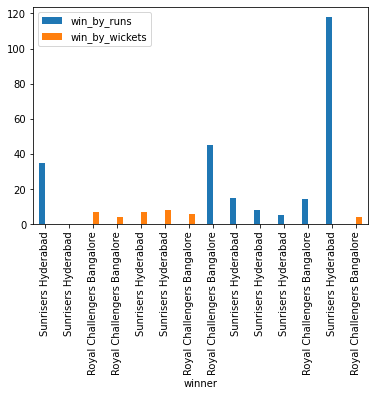

In [47]:
#Lets look at how each tean won the matches 
import matplotlib.pyplot as plt
df_RCB_SRH = df_RCB_SRH[['win_by_runs','win_by_wickets','winner']]
df_RCB_SRH.plot( "winner", kind="bar")

**Conclusion :-**



*   From above bar plot one thing i observed clearly is that SRH won most of the matches by batting first. Because whenever they won the match against RCB they won it by runs not by wickets mostly.
*   In one match they almost won it by 120 runs. That tells you that SRH will defend the targets very well. But RCB won matches when they are chasing mostly.



*   One match went to superover and SRH won that match i.e why in above plot for one of the matches it showing nothing.
*   So today match is about best chasing team(RCB) vs best defending team(SRH)



*   RCB players won more man of the match awards, So i can say RCB has more match winners then SRH.
*   I am predicting RCB will win today match.







### Q2) What will be sandeep sharma economy rate and how many boundaries he will give away in his 4 overs?

In [48]:
from functools import reduce

df_sandeep = df_deliveries[(df_deliveries['bowler'] == 'Sandeep Sharma')]


runs_given = df_sandeep[(df_sandeep['legbye_runs'] == 0) & (df_sandeep['bye_runs'] == 0)]
df_runs_given = df_sandeep.groupby(['match_id'],as_index=False)['total_runs'].sum()
df_runs_given.rename(columns={'total_runs':'runs_given'},inplace=True)

balls_bowled = df_sandeep[(df_sandeep['wide_runs'] == 0) & (df_sandeep['noball_runs'] == 0)]
df_balls_bowled = balls_bowled.groupby(['match_id','bowler'],as_index=False)['ball'].count()
df_balls_bowled.rename(columns={'ball':'balls_bowled'},inplace=True)

#Now merging above 2 dataframes
df_all = [df_runs_given,df_balls_bowled]
df_economy_rate_sandeep = reduce(lambda  left,right: pd.merge(left,right,on=['match_id'],how='outer'), df_all) 

df_economy_rate_sandeep['economy_rate'] = (df_economy_rate_sandeep['runs_given']/df_economy_rate_sandeep['balls_bowled'])*6
df_economy_rate_sandeep.head()

,match_id,runs_given,bowler,balls_bowled,economy_rate
0,4,33,Sandeep Sharma,24,8.250000
1,8,26,Sandeep Sharma,24,6.500000
2,11,28,Sandeep Sharma,18,9.333333
3,15,41,Sandeep Sharma,24,10.250000
4,19,38,Sandeep Sharma,24,9.500000


In [49]:
#Calculating number of boundaries he given in each match
df_boundaries = df_sandeep[(df_sandeep['batsman_runs'] == 4) | (df_sandeep['batsman_runs'] == 6)]

df_boundaries = df_boundaries.groupby('match_id',as_index=False)['batsman_runs'].count()
df_boundaries.rename(columns={'batsman_runs':'boundaries_given'},inplace=True)
df_boundaries.head()

#Now merging econmy dataframe and boundaries dataframe
df_all = [df_economy_rate_sandeep,df_boundaries]
df_sandeep_ec_bn = reduce(lambda  left,right: pd.merge(left,right,on=['match_id'],how='outer'), df_all) 
df_sandeep_ec_bn.head()

,match_id,runs_given,bowler,balls_bowled,economy_rate,boundaries_given
0,4,33,Sandeep Sharma,24,8.250000,5
1,8,26,Sandeep Sharma,24,6.500000,4
2,11,28,Sandeep Sharma,18,9.333333,5
3,15,41,Sandeep Sharma,24,10.250000,8
4,19,38,Sandeep Sharma,24,9.500000,4


In [50]:
#Now calculating number of matches where he bowled atleast 1 ball.
df_matches = df_sandeep['match_id'].nunique()
print("Number of matches sandeep played is: ",df_matches,"\n")

#Calculating in number of matches he has economy >7.5 and give away >4 boundaries
df_ec_bound = df_sandeep_ec_bn[(df_sandeep_ec_bn['economy_rate'] > 7.5) & (df_sandeep_ec_bn['boundaries_given'] > 4)]
eco_bound = df_ec_bound.shape[0]
print("Number of matches sandeep has economy rate >7.5 and give away more than 4 boundaries is:",eco_bound,'\n')

#Calculating in number of matches he has economy >7.5 and give away <=4 boundaries
df_ec_bound = df_sandeep_ec_bn[(df_sandeep_ec_bn['economy_rate'] > 7.5) & (df_sandeep_ec_bn['boundaries_given'] <= 4)]
eco_bound = df_ec_bound.shape[0]
print("Number of matches sandeep has economy rate >7.5 and give away <= 4 boundaries is:",eco_bound,'\n')

#Calculating in number of matches he has economy >7.5 and give away <=4 boundaries
df_ec_bound = df_sandeep_ec_bn[(df_sandeep_ec_bn['economy_rate'] <= 7.5) & (df_sandeep_ec_bn['boundaries_given'] > 4)]
eco_bound = df_ec_bound.shape[0]
print("Number of matches sandeep has economy rate <=7.5 and give away > 4 boundaries is:",eco_bound,'\n')

#Calculating in number of matches he has economy >7.5 and give away <=4 boundaries
df_ec_bound = df_sandeep_ec_bn[(df_sandeep_ec_bn['economy_rate'] <= 7.5) & (df_sandeep_ec_bn['boundaries_given'] <= 4)]
eco_bound = df_ec_bound.shape[0]
print("Number of matches sandeep has economy rate <=7.5 and give away <= 4 boundaries is:",eco_bound)

Number of matches sandeep played is:  68 

Number of matches sandeep has economy rate >7.5 and give away more than 4 boundaries is: 25 

Number of matches sandeep has economy rate >7.5 and give away <= 4 boundaries is: 11 

Number of matches sandeep has economy rate <=7.5 and give away > 4 boundaries is: 0 

Number of matches sandeep has economy rate <=7.5 and give away <= 4 boundaries is: 32


**Conclusion :-**



*   From above observation we can easily eliminate two options. i.e (>7.5 & <=4) and (<=7.5 & > 4).
*   25 matches his economy is more than 7.5 and give away more than 4 boundaries. 32 matches his economy is <=7.5.

I am predicting in today match his economy >7.5 and boundaries >4.





### Q3) How many batsman from both teams will have strike rate more than 130 and hit more than 3 boundaries of which atleast 2 boundaries should be fours. Consider only those batsman who played atleast 10 balls.

In [51]:
df_RCBvsSRH = df_deliveries[((df_deliveries['batting_team'] == 'Royal Challengers Bangalore') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad')) |
                            ((df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Royal Challengers Bangalore'))]

#calculating number of runs batsman scored in each match
df_runs_scored = df_RCBvsSRH.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].sum()
df_runs_scored.rename(columns={'batsman_runs':'runs_scored'},inplace=True)

#calculating balls faced by batsman in each match
df_balls_faced = df_RCBvsSRH[(df_RCBvsSRH['wide_runs'] == 0)]
df_balls_faced = df_balls_faced.groupby(['match_id','batsman'],as_index=False)['ball'].count()
df_balls_faced.rename(columns={'ball':'balls_faced'},inplace=True)

#calculating number of boundaries hitted by batsman in each match
df_boundaries = df_RCBvsSRH[(df_RCBvsSRH['batsman_runs'] == 4) | (df_RCBvsSRH['batsman_runs'] == 6)]
df_boundaries = df_boundaries.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].count()
df_boundaries.rename(columns={'batsman_runs':'no_of_boundaries'},inplace=True)

#calculating number of boundaries hitted by batsman in each match
df_4s = df_RCBvsSRH[(df_RCBvsSRH['batsman_runs'] == 4)]
df_4s = df_4s.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].count()
df_4s.rename(columns={'batsman_runs':'no_of_4s'},inplace=True)

#Merging above all dataframes
df_all = [df_runs_scored,df_balls_faced,df_boundaries,df_4s]
df_strike_rate = reduce(lambda  left,right: pd.merge(left,right,on=['match_id','batsman'],how='outer'), df_all) 

#Calculating strike rate 
df_strike_rate['strike_rate'] = round((df_strike_rate['runs_scored'] / df_strike_rate['balls_faced'])*100,2)
df_strike_rate.head()

,match_id,batsman,runs_scored,balls_faced,no_of_boundaries,no_of_4s,strike_rate
0,1,A Choudhary,6,2,1.0,NaN,300.00
1,1,BCJ Cutting,16,6,2.0,NaN,266.67
2,1,CH Gayle,32,21,5.0,2.0,152.38
3,1,DA Warner,14,8,3.0,2.0,175.00
4,1,DJ Hooda,16,12,1.0,NaN,133.33


In [52]:
#Sometimes if batsman not hitted any boundaries or not scored any runs in that situations Null value is printing'
#So i am replacing null value with 0
df_strike_rate.fillna(0,inplace=True)
df_strike_rate.head()

,match_id,batsman,runs_scored,balls_faced,no_of_boundaries,no_of_4s,strike_rate
0,1,A Choudhary,6,2,1.0,0.0,300.00
1,1,BCJ Cutting,16,6,2.0,0.0,266.67
2,1,CH Gayle,32,21,5.0,2.0,152.38
3,1,DA Warner,14,8,3.0,2.0,175.00
4,1,DJ Hooda,16,12,1.0,0.0,133.33


In given question we have to pick batsman whose strike rate is above 130, balls faced > 10, boundaries is > 3 and atlest 2 4s.

In [53]:
df_strike_rate = df_strike_rate[(df_strike_rate['balls_faced'] > 10) & (df_strike_rate['strike_rate'] > 130) &
                                (df_strike_rate['no_of_boundaries'] > 3) & (df_strike_rate['no_of_4s'] >= 2) ]

df_strike_rate.head()                               

,match_id,batsman,runs_scored,balls_faced,no_of_boundaries,no_of_4s,strike_rate
2,1,CH Gayle,32,21,5.0,2.0,152.38
5,1,KM Jadhav,31,16,5.0,4.0,193.75
6,1,MC Henriques,52,37,5.0,3.0,140.54
7,1,Mandeep Singh,24,16,5.0,5.0,150.00
16,1,Yuvraj Singh,62,27,10.0,7.0,229.63


In [54]:
#Now i am calculating how many batsman in each match satisfied given conditions.
df_codn_satisfied_eachmatch = df_strike_rate.groupby('match_id',as_index=False)['batsman'].count()
df_codn_satisfied_eachmatch.rename(columns={'batsman':'no_of_batsman'},inplace=True)
df_codn_satisfied_eachmatch.head()

,match_id,no_of_batsman
0,1,5
1,432,3
2,481,2
3,503,1
4,525,4


count    13.000000
mean      3.615385
std       1.502135
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: no_of_batsman, dtype: float64

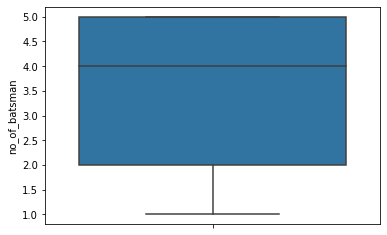

In [55]:
#Now i a calculating median and percentiles
import seaborn as sns
ax = sns.boxplot(y="no_of_batsman", data=df_codn_satisfied_eachmatch)
df_codn_satisfied_eachmatch['no_of_batsman'].describe()

**Conclusion :-**



*   50% of the matches the numbers of batsman satisfied given condition is less than or equal to 4 and mean is also 3.6.
*   So i am predicting in today match also 3-4 batsman will have strike rate above 130 and balls faced > 10 at the same time number of boundaries hitted is >3 out of them atleast 2 are fours.



### Q4) Which batsman will have highest (runs scored through boundaries - runs scored throgh 1s2s3s) to (total runs scored in the match). Consider only those players who play more than 10 deliveries?

In [59]:
#Here i am looking at each batsman ratio who are playing today.
#Here i am filtering top 4 batsman from both teams because 
#in question mentioned that batsman has to play more than 10 balls. Mostly top order batsman will face 10 or more deliveries
# We can hardly see lower order or tailenders get 10 balls to face. i.e why i am taking only top 4 batsman from both teams
df_batsman = df_deliveries[(df_deliveries['batsman'] == 'DA Warner') | (df_deliveries['batsman'] == 'WP Saha') |
                           (df_deliveries['batsman'] == 'MK Pandey') | (df_deliveries['batsman'] == 'KS Williamson') |
                           (df_deliveries['batsman'] == 'V Kohli') | (df_deliveries['batsman'] == 'S Dube') |
                           (df_deliveries['batsman'] == 'AB de Villiers') | (df_deliveries['batsman'] == 'Washington Sundar')]

df_total_runs_scored = df_batsman.groupby('batsman',as_index=False)['batsman_runs'].sum()
df_total_runs_scored.rename(columns={'batsman_runs':'total_runs_scored'},inplace=True)

df_boundary_runs = df_batsman[(df_batsman['batsman_runs'] == 4) | (df_batsman['batsman_runs'] == 6)]
df_boundary_runs = df_boundary_runs.groupby('batsman',as_index=False)['batsman_runs'].sum()
df_boundary_runs.rename(columns={'batsman_runs':'boundary_runs'},inplace=True)

df_1s2s3s_runs = df_batsman[(df_batsman['batsman_runs'] >= 1) & (df_batsman['batsman_runs'] <= 3)]
df_1s2s3s_runs = df_1s2s3s_runs.groupby('batsman',as_index=False)['batsman_runs'].sum()
df_1s2s3s_runs.rename(columns={'batsman_runs':'1s2s3s_runs'},inplace=True)

#Now merging all above datframes
df_all = [df_boundary_runs,df_1s2s3s_runs,df_total_runs_scored]
df_ratio = reduce(lambda  left,right: pd.merge(left,right,on='batsman',how='outer'), df_all) 

#Now claculating ratio for each batsman
df_ratio['ratio'] = (df_ratio['boundary_runs'] - df_ratio['1s2s3s_runs']) / (df_ratio['total_runs_scored'])
df_ratio.head(10)

,batsman,boundary_runs,1s2s3s_runs,total_runs_scored,ratio
0,AB de Villiers,2712,1716,4428,0.224932
1,DA Warner,2922,1809,4741,0.234761
2,KS Williamson,708,606,1319,0.077331
3,MK Pandey,1468,1394,2872,0.025766
4,S Dube,22,18,40,0.100000
5,V Kohli,3074,2360,5434,0.131395
6,WP Saha,998,782,1780,0.121348
7,Washington Sundar,44,35,79,0.113924


**Conclusion :-**



*   Warner and De villiers has highest ratio bwarner has slightly higher than ABD.
*   But in given options Along with AB you mentioned saha and along with warner you mentioned williamson. So if you look at saha has higher ratio than williamson.

So i am predicting Ab de villiers or saha will have highest ratio.



### Q5) How many wickets totally will loose in powerplay by 2  teams?

In [60]:
df_RCBSRH_PP = df_deliveries[((df_deliveries['batting_team'] == 'Sunrisers Hyderabad') & (df_deliveries['bowling_team'] == 'Royal Challengers Bangalore') |
                           (df_deliveries['batting_team'] == 'Royal Challengers Bangalore') & (df_deliveries['bowling_team'] == 'Sunrisers Hyderabad')) &
                           (df_deliveries['over'] <= 6)] 

df_wickets = df_RCBSRH_PP[df_RCBSRH_PP['player_dismissed'] != 'No Wicket']
df_wickets = df_wickets.groupby('match_id',as_index=False)['player_dismissed'].count()
df_wickets.rename(columns={'player_dismissed':'Number_of_wickets'}, inplace=True)
df_wickets.head()

,match_id,Number_of_wickets
0,1,2
1,388,4
2,432,2
3,481,4
4,503,2


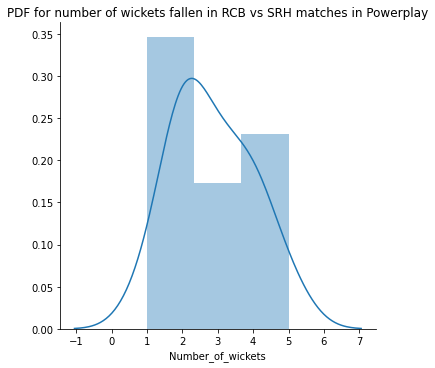

count    13.000000
mean      2.846154
std       1.143544
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Number_of_wickets, dtype: float64

In [62]:
#Now plotting PDF of wickets in each match
sns.FacetGrid(df_wickets,size=5) \
   .map(sns.distplot, "Number_of_wickets") \
   .add_legend();

plt.title("PDF for number of wickets fallen in RCB vs SRH matches in Powerplay")
plt.show();
df_wickets['Number_of_wickets'].describe()

**Conclusion :-**



*   Probability is very high is for wickets = 2 and mean is 2.8 and 75% matches wickets lost in powerplay is less than 4.
*   So i am predicting in today match also they will loose 2 wickets in powerplay.

